In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("./employee_attrition_data.csv")
df.head(2)

,ID,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,1,3.8,5.3,3,167,3,0,0,sales,low,1
1,2,8.0,8.6,6,272,6,0,0,sales,medium,1


In [6]:
df.shape

(25491, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      25491 non-null  int64  
 1   satisfaction_level      25491 non-null  float64
 2   last_evaluation_rating  25491 non-null  float64
 3   projects_worked_on      25491 non-null  int64  
 4   average_montly_hours    25491 non-null  int64  
 5   time_spend_company      25491 non-null  int64  
 6   Work_accident           25491 non-null  int64  
 7   promotion_last_5years   25491 non-null  int64  
 8   Department              25491 non-null  object 
 9   salary                  25491 non-null  object 
 10  Attrition               25491 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.1+ MB


In [8]:
df.describe()

,ID,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,12746.000000,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,7358.762192,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,1.000000,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,6373.500000,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,12746.000000,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,19118.500000,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,25491.000000,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

ID                        0
satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(25491, 11)

In [14]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'], dtype=object)

In [15]:
le = LabelEncoder()

In [16]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

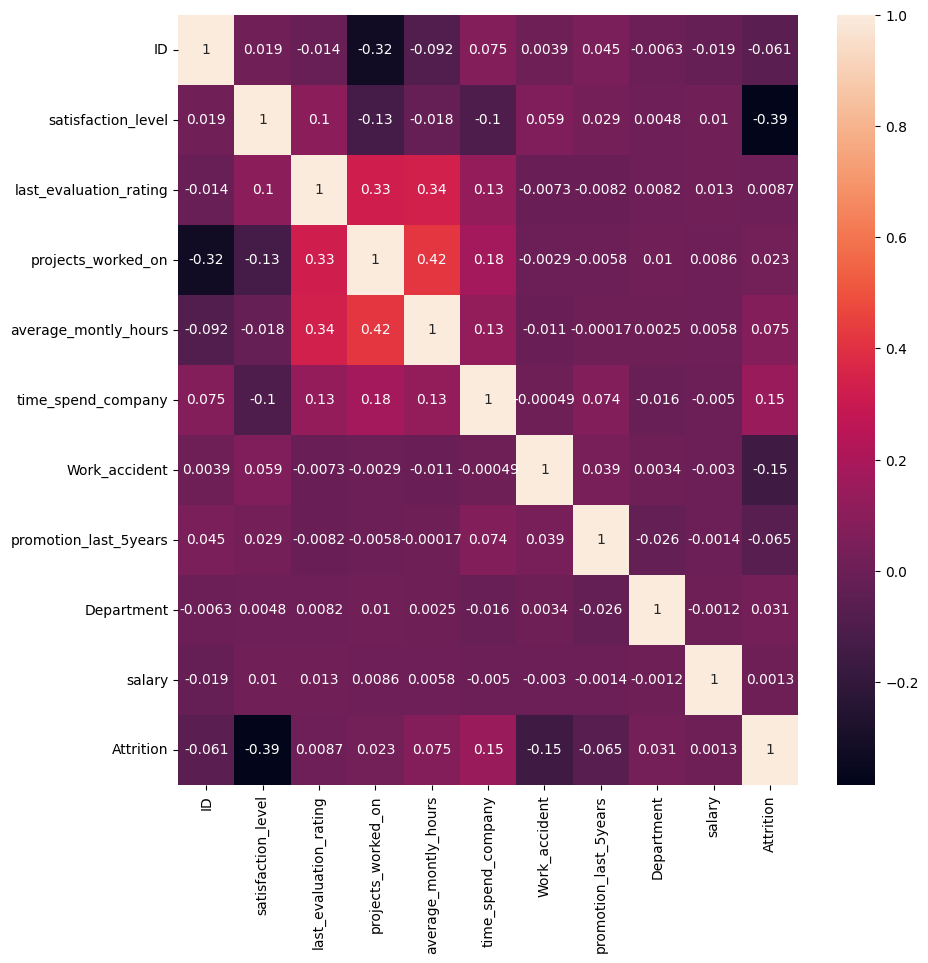

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [19]:
y.value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [23]:
X_test

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
22697,-0.936707,-1.256183,-1.668218,-1.019491,-0.360621,-0.419809,-0.139256,8,1
4606,0.800559,0.317352,-0.156266,0.203890,-0.360621,-0.419809,-0.139256,4,0
17021,-0.492290,-0.265439,-0.912242,1.006107,-1.034918,2.382034,-0.139256,9,2
17937,0.719756,-0.964788,-0.156266,-1.179935,-0.360621,-0.419809,-0.139256,9,2
6978,0.840960,0.783584,1.355687,0.023391,0.313676,-0.419809,-0.139256,9,1
...,...,...,...,...,...,...,...,...,...
15226,1.446983,-0.615113,-0.156266,-0.738715,-0.360621,-0.419809,7.181017,2,0
15484,-0.249881,1.133259,-0.156266,-0.337607,0.313676,2.382034,-0.139256,3,1
12944,-0.815502,-1.838974,-1.668218,-0.197219,-1.034918,-0.419809,-0.139256,7,1
2610,0.315740,0.375631,1.355687,1.467382,-1.034918,2.382034,-0.139256,8,1


In [24]:
# Create a Linear Regression model and fit it
lr =LogisticRegression()
model = lr.fit(X_train,y_train)

In [25]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7721121788585997

In [27]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

97.66620906060012

In [28]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

98.80368699745048